<a href="https://colab.research.google.com/github/MachineTech2022/CounterStrike-/blob/main/Caso_CSGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CASO FUNDAMENTOS DE MACHINE LEARNING

####Felipe Muñoz


# Metodología Orientadas a Datos: CRISP-DM

##Introducción



En este proyecto, se nos entrega información de un juego llamado Counter Strike en donde deberemos estudiar los datos de distintos jugadores y partidas, para ser estudiados utilizaremos la metodología CRISP-DM en esta primera parte comenzaremos reconociendo el negocio y después evaluaremos los patrones y outliers para una futura limpieza de la data y modelar en un futuro.

Para finalizar se, evaluarán los distintos modelos de entrenamiento para seleccionar la mejor opción de modelo.



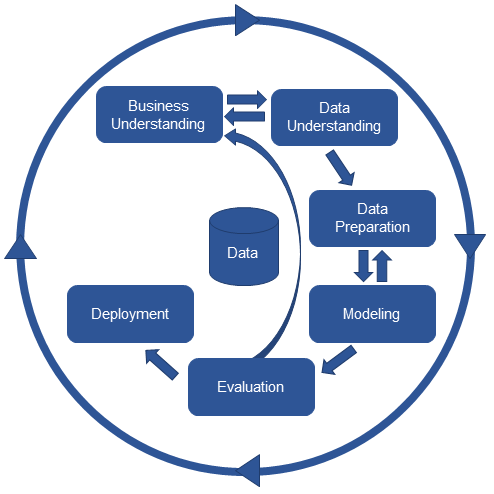

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVR,SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#**Fase I Business Understading / Conocer el Negocio**

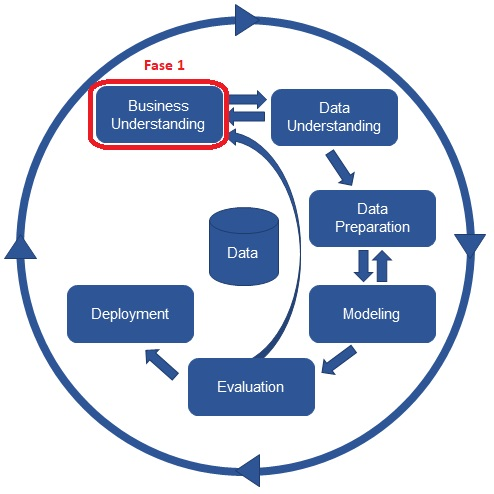

##Comprensión del negocio 

Se nos han entregado una cantidad de datos considerables para ser estudiados del juego COUNTER STRIKE que es un juego que se distingue por ser competitivo nos centraremos en reconocer patrones para poder darle valor a los datos podemos estudiar que tipos de armas son más utilizadas para futuras actualizaciones, predicciones de supervivencias para futuros torneos y mucho más que iremos agregando en este proyecto.

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Fundamentos de machine learning/caso semestral fundamentos/demo_round_traces.csv', sep=';')
dataset

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,254527.691176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,123775,de_mirage,CounterTerrorist,2,511,5,76561198024905796,False,False,False,...,0,0,0,5600,27100,4,0,2,2,768003.878843
79153,123776,de_mirage,CounterTerrorist,2,511,5,76561198000020858,False,False,False,...,0,1,0,5500,27100,8,5,1,3,692262.605640
79154,123777,de_mirage,CounterTerrorist,2,511,5,76561198013485667,False,False,False,...,0,0,0,4950,27100,5,0,2,3,161310.783653
79155,123778,de_mirage,CounterTerrorist,2,511,5,76561197972003061,False,False,False,...,0,0,0,4950,27100,1,0,1,0,984575.199373


#**Fase II Data Understanding/Análisis de datos**

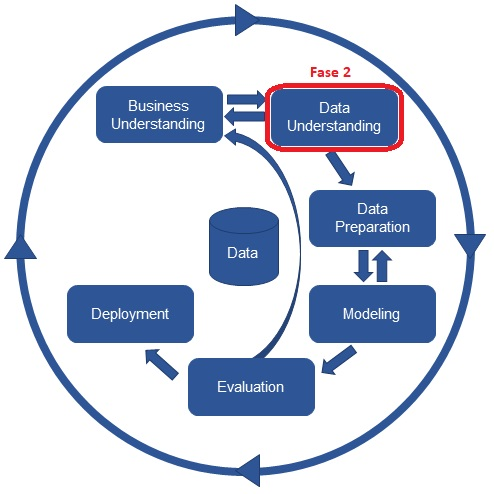

### Conocimiento de outliers

In [ ]:
dataset.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,SteamId,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
count,79157.000000,79157.000000,79157.000000,79157.000000,7.915700e+04,79157.000000,79157.000000,7.915700e+04,7.915700e+04,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,7.915700e+04
mean,60570.193640,1.500006,250.525033,12.765517,7.656120e+16,72.795720,0.829561,1.122538e+06,1.041888e+05,84.351773,...,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484,6.288927e+05
std,36436.598386,0.500003,149.557804,7.432837,3.342137e+07,48.321035,0.210842,1.134700e+06,3.543487e+05,171.890139,...,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752,3.402574e+05
min,600.000000,1.000000,4.000000,1.000000,7.656120e+16,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,30830.000000,1.000000,128.000000,6.000000,7.656120e+16,47.080072,0.698892,2.578825e+05,5.898255e+04,56.202641,...,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000,4.097790e+05
50%,56720.000000,2.000000,236.000000,12.000000,7.656120e+16,69.239615,0.922777,7.409804e+05,8.601557e+04,83.617316,...,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000,5.542432e+05
75%,90639.000000,2.000000,373.000000,19.000000,7.656120e+16,92.647813,1.000000,1.753172e+06,1.213966e+05,104.131144,...,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000,7.524568e+05
max,123779.000000,2.000000,511.000000,36.000000,7.656120e+16,2990.560394,2.000000,2.202346e+07,3.964645e+07,24111.819781,...,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000,5.170168e+06


En esta descripción nos encontramos con distintos datos estadísticos en una primera impresión se pudieron encontrar distintos outliers tales como



*   TimeAlive
*   AvgRoundVelocity
*   RoundAssist
*   RoundHeadshots
*   RoundFlankskill
*   MatchKills
*   MatchFlankskill
*   MatchAssist
*   MatchHeadshots

TimeAlive y AvgRoundVelocity son las que consideramos más importantes mientras que los otros datos podemos encontrar outliers mediante los percentiles pero estos parámetros por estudios externos no nos parecen extraños ya que en este juego hay personas que sobresalen en acciones como asistencias, headshot y otros por esto nos centraremos en las 2 columnas la de TimeAlive y AvgRoundVelocity











In [ ]:
dataset['TimeAlive'].describe()

count    79157.000000
mean        72.795720
std         48.321035
min          0.000000
25%         47.080072
50%         69.239615
75%         92.647813
max       2990.560394
Name: TimeAlive, dtype: float64

En estos datos nos encontramos con un outliers bastante notorio en donde un jugador sobrevivo 2990 segundos que es demasiado exagerado que puede darse debido a un error o una persona que pillo un error en el juego en el futuro se está pensando en borrar este dato ya que la probabilidad de que esto vuelva a suceder es bastante bajas.

In [ ]:
dataset['AvgRoundVelocity'].describe()

count    79157.000000
mean        84.351773
std        171.890139
min          0.000000
25%         56.202641
50%         83.617316
75%        104.131144
max      24111.819781
Name: AvgRoundVelocity, dtype: float64

En este caso podemos ver que hay una gran diferencia en AvgRoundVelocity esta diferencia es demasiado notoria en los percentiles así que también pensamos que puede ser un error del juego o algún jugador aprovechándose de un sistema externo para poder producir errores en el juego en un futuro planeamos borrar este dato ya que afecta a la limpieza de los datos.

In [ ]:
dataset['TimeAlive'].max()/60

49.84267322633807

Acá podemos ver los segundos del ouliers pasados a minutos fueron 49 minutos y un poco más.

###Reconocimiento de datos

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'SteamId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch',
       'TimeAlive', 'ScaledTimeAlive', 'AvgCentroidDistance',
       'TravelledDistance', 'AvgRoundVelocity', 'AvgKillDistance',
       'AvgSiteDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
       'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
       'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills',
       'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'AvgMatchKillDist'],
      dtype='object')

Acá hicimos un reconocimiento de las columnas entregadas en el dataset

In [ ]:
#Cantidad de Filas/Columnas
dataset.shape

(79157, 37)

En este punto reconocemos la cantidad de filas y columnas para tener en cuenta con cuantos datos estamos trabajando 

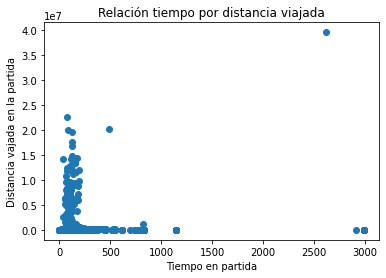

In [ ]:
np.random.seed(3)
x = dataset['TimeAlive']
y = dataset['TravelledDistance']

plt.scatter(x, y)
plt.xlabel('Tiempo en partida')
plt.ylabel('Distancia vajada en la partida')
plt.title('Relación tiempo por distancia viajada')
plt.show()


Se analiza el tiempo en partida con respecto a la distancia recorrida, con esto nos dimos cuenta que hay jugadores que tuvieron un tiempo en partida cercana a los 3000 segundos pero no recorrieron ninguna distancia en la partida, además en el grafico podemos observar que hay una gran concentración de datos mayor a 250 segundos en partida, lo que nos hace pensar que en esas rondas los jugadores pidieron tiempo fuera o se desconectó un jugador, ya que, cada ronda dura 90 segundos (contando la fase de compra) y en caso de ser plantada la bomba se le suman 40 segundos más como máximo dando un total de 130 segundos y en el caso de pedir tiempo fuera o que se desconecte un jugador da un máximo de 190 segundos por ronda.


In [ ]:
df1 = dataset

In [ ]:

df_time= df1[(df1['TimeAlive']>= 200)] # trae todas las cuyo TimeAlive sea mayor o igual a 200 y lo guarda en una variable
df_time = df_time[['MatchId','SteamId','TimeAlive','TravelledDistance','AvgRoundVelocity','RoundKills','RoundId','AbnormalMatch','MatchWinner']] #trae las columnas que utilizaremos y las guarda en una variable
df_time

,MatchId,SteamId,TimeAlive,TravelledDistance,AvgRoundVelocity,RoundKills,RoundId,AbnormalMatch,MatchWinner
969,12,76561197960710573,798.281373,0.000000,0.000000,0,2,False,False
970,12,76561198006920295,798.281373,0.000000,0.000000,0,2,False,False
971,12,76561198000782895,798.281373,0.000000,0.000000,0,2,False,False
972,12,76561197978241352,798.281373,0.000000,0.000000,0,2,False,False
973,12,76561197974587647,798.281373,0.000000,0.000000,0,2,False,False
...,...,...,...,...,...,...,...,...,...
72972,479,76561197991348083,347.072216,77679.150315,13.991201,0,5,False,False
72973,479,76561197988627193,406.011366,152746.706461,23.517584,0,5,False,False
72974,479,76561197969684910,410.949004,226035.250144,34.383214,0,5,False,False
72975,479,76561198031554200,410.949004,113976.237642,17.337426,2,5,False,False


Separamos los jugadores que tuvieron un tiempo vivo en partida mayor o igual a 200 segundos para poder identificarlos, estos vendrían a ser los outliers descritos anteriormente que son 397 registros que se deberán evaluar si es necesario hacer algún tipo de limpieza.

In [ ]:
df_time[df_time.TimeAlive == 2990.560393580284]

,MatchId,SteamId,TimeAlive,TravelledDistance,AvgRoundVelocity,RoundKills,RoundId,AbnormalMatch,MatchWinner
1029,12,76561197960710573,2990.560394,0.0,0.0,0,8,False,False
1030,12,76561198006920295,2990.560394,0.0,0.0,0,8,False,False
1031,12,76561198000782895,2990.560394,0.0,0.0,0,8,False,False
1032,12,76561197978241352,2990.560394,0.0,0.0,0,8,False,False
1034,12,76561197963914156,2990.560394,0.0,0.0,0,8,False,True
1036,12,76561198013603966,2990.560394,0.0,0.0,0,8,False,True
1038,12,76561197983695262,2990.560394,0.0,0.0,0,8,False,True


Para poder continuar con el análisis observamos que la ronda donde se produce el mayor outlier en timeAlive es la ronda 8 de la partida 12, algo curioso que nos pudimos dar cuenta es que hay 7 jugadores con el mismo tiempo vivo


In [ ]:
df3=df1[(df1['MatchId'] ==12)  &(df1['RoundId'] == 8)]
df3[['MatchId','TimeAlive','TravelledDistance','AvgRoundVelocity','RoundKills',]]

,MatchId,TimeAlive,TravelledDistance,AvgRoundVelocity,RoundKills
1029,12,2990.560394,0.000000e+00,0.000000,0
1030,12,2990.560394,0.000000e+00,0.000000,0
1031,12,2990.560394,0.000000e+00,0.000000,0
1032,12,2990.560394,0.000000e+00,0.000000,0
1033,12,2621.484484,3.964645e+07,354.536997,0
1034,12,2990.560394,0.000000e+00,0.000000,0
1035,12,824.419562,1.267475e+06,36.041593,0
1036,12,2990.560394,0.000000e+00,0.000000,0
1037,12,2914.372849,9.745704e+03,0.078392,0
1038,12,2990.560394,0.000000e+00,0.000000,0


Visualizamos todos los registros de la ronda 8 del match con id 12, en este caso nos damos cuenta que al visualizar los 10 jugadores que estuvieron en la partida todos tienen un tiempo vivo mayor a los 200 segundos, lo cual nos damos cuenta que todos ellos son outliers y que algo anormal ocurrio en esa partida que debido a la falta de datos no se puede saber con exactitud porque ocurrio esto.

In [ ]:
df2 =df1[(df1['MatchId'] ==12)]
df2 =df2[['RoundKills','SteamId']].groupby(['SteamId']).sum() 
df2
#df2[['MatchId','TimeAlive','TravelledDistance','AvgRoundVelocity','RoundKills']]

,RoundKills
SteamId,
76561197960710573,10
76561197963914156,21
76561197972331023,12
76561197974587647,16
76561197978241352,21
76561197983695262,11
76561198000782895,18
76561198006920295,14
76561198013603966,9


Observando la cantidad de kills de cada jugador no se ve nada anormal en esto pareciera ser una partida normal y no fuera de lo común ya que ninguna se aleja en números muy exorbitantes.

In [ ]:
grafico_pie = df1[df1['RoundWinner']== True].groupby(['Team']).count()
grafico_pie

,Unnamed: 0,Map,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
Team,,,,,,,,,,,,,,,,,,,,,
CounterTerrorist,16739,16739,16739,16739,16739,16739,16739,16739,16739,16739,...,16739,16739,16739,16739,16739,16739,16739,16739,16739,16739
Terrorist,22829,22829,22829,22829,22829,22829,22829,22829,22829,22829,...,22829,22829,22829,22829,22829,22829,22829,22829,22829,22829


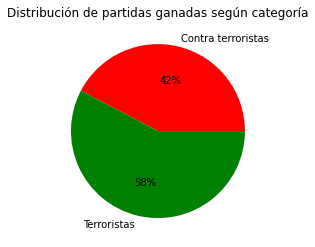

In [ ]:
var1 = grafico_pie['Unnamed: 0']
contra_terroristas = 16739
terroristas = 22829

nombres= ('Contra terroristas','Terroristas')
grafico_t_c = (contra_terroristas,terroristas)
colores = ('red','green')

plt.pie(grafico_t_c, colors=colores, labels=nombres, autopct=('%1.f%%'))
plt.title("Distribución de partidas ganadas según categoría")
plt.show()

En estos datos podemos analizar la distribución de partidas ganadas por categoría de Terrorista/Contra Terrorista podemos ver que con un 58% ciento al jugar como terroristas tienen más posibilidades de ganar con estos datos podríamos aportar que los jugadores se sienten más cómodos jugando las rondas en que son terroristas.

In [ ]:
dataset.dtypes

Unnamed: 0                       int64
Map                             object
Team                            object
InternalTeamId                   int64
MatchId                          int64
RoundId                          int64
SteamId                          int64
RoundWinner                       bool
MatchWinner                       bool
Survived                          bool
AbnormalMatch                     bool
TimeAlive                      float64
ScaledTimeAlive                float64
AvgCentroidDistance            float64
TravelledDistance              float64
AvgRoundVelocity               float64
AvgKillDistance                float64
AvgSiteDistance                float64
RLethalGrenadesThrown            int64
RNonLethalGrenadesThrown         int64
PrimaryAssaultRifle            float64
PrimarySniperRifle             float64
PrimaryHeavy                   float64
PrimarySMG                     float64
PrimaryPistol                    int64
FirstKillTime            

Nos encontramos con que la mayoría de datos que nos entregan en este dataset son numéricos que nos facilita el tratamiento ya que si nos toca trabajar con los datos tipos object o boolean la cantidad de tratamientos seria mínima

In [ ]:
#Para reconocer la cantidad de nulos en el dataset
dataset.isnull().sum()

Unnamed: 0                     0
Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
SteamId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
ScaledTimeAlive                0
AvgCentroidDistance            0
TravelledDistance              0
AvgRoundVelocity               0
AvgKillDistance                0
AvgSiteDistance                0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStart

Al investigar la data nos encontramos con que esta no posee nulos en ninguna columna esto nos quitara un peso de encima ya que no tendremos que hacer tratamiento de nulos en el futuro 

En este punto del proyecto prepararemos los datos para un futuro poder crear modelos predictivos y darles utilidad a los datos y de esta manera darles un valor.



#**Fase III Data Preparation  /  Análisis de datos y Selección de características**

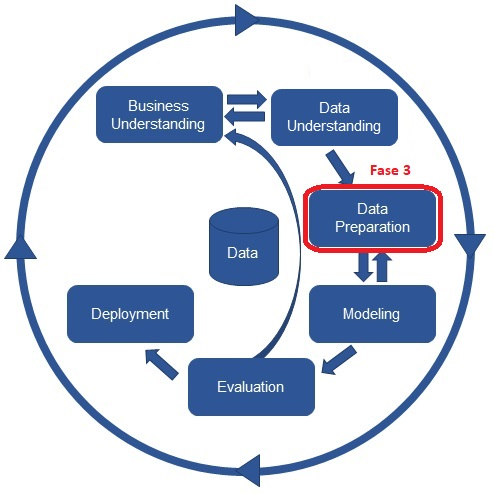

## Tratamiento de outliers

A continuación, se hará una eliminación de los outliers de TimeAlive, ya que, hay rondas donde los jugadores tienen tiempo en la ronda mayor a 190 y como ya mencionamos anteriormente esto es imposible además que no podemos asignarle un valor en concreto porque podrían causar problemas a futuro.

In [ ]:
datosAEliminar = dataset.TimeAlive[dataset['TimeAlive']>190].count()
datosAEliminar

457

In [ ]:
print((datosAEliminar/dataset.TimeAlive.count())*100,'% de datos eliminados')

0.5773336533724118 % de datos eliminados


En total se eliminarán 457 filas de nuestros registros esto equivale al 0.57% de la data total, por lo que, no afectara gravemente al análisis.

In [ ]:
eliminar = dataset.TimeAlive[dataset['TimeAlive']>190].index
dataset_limp = dataset.drop(eliminar, axis=0)

## Comparación de la data

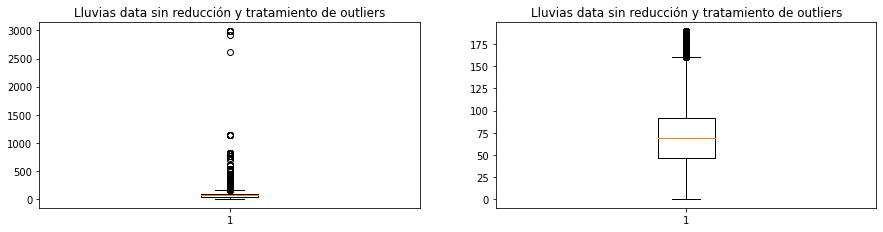

In [ ]:

plt.figure(figsize=(15, 7.5))
ax1 = plt.subplot(2,2, 1)
ax1.set_title('Lluvias data sin reducción y tratamiento de outliers')
ax1.boxplot(dataset.TimeAlive)
ax1 = plt.subplot(2,2, 2)
ax1.set_title('Lluvias data sin reducción y tratamiento de outliers')
ax1.boxplot(dataset_limp.TimeAlive)
plt.show()

cómo se visualiza en los gráficos de arriba podemos ver que los datos variaron bastante al punto de que ahora si se puede analizar y de forma más exacta, Análisis:


*   Se visualiza con mayor eficiencia el promedio de TimeAlive y sabemos que está cercano a los 70 segundos en partida
*   aun continúan habiendo outliers pero son aceptables para la cantidad de datos con las cuales trabajaremos, ya que, pueden ser rondas en las cuales alguno de los equipos pidió tiempo fuera.




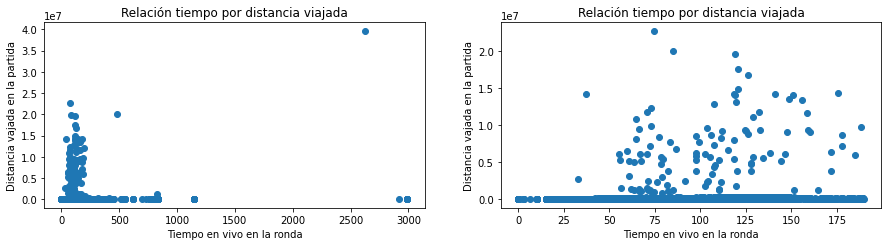

In [ ]:
plt.figure(figsize=(15, 7.5))
ax = plt.subplot(2,2, 1)
x = dataset['TimeAlive']
y = dataset['TravelledDistance']

ax.scatter(x, y)
plt.xlabel('Tiempo en vivo en la ronda')
plt.ylabel('Distancia vajada en la partida')
plt.title('Relación tiempo por distancia viajada')

ax = plt.subplot(2,2, 2)
x = dataset_limp['TimeAlive']
y = dataset_limp['TravelledDistance']

ax.scatter(x, y)
plt.xlabel('Tiempo en vivo en la ronda')
plt.ylabel('Distancia vajada en la partida')
plt.title('Relación tiempo por distancia viajada')
plt.show()


Con la limpieza realizada anteriormente nos podemos dar cuenta que también disminuyo el outliers gigante que había en la distancia recorrida, esto se debe a que estaba relacionado directamente con el tiempo que estuvo en la ronda  además que al hacer dicha limpieza logramos obtener gráficos más entendibles de lo que queremos visualizar.

## Label Encoding

El label encode es un tipo de transformación de datos en los cuales transforma datos de carácter cualitativo ordinal en datos cuantitativos discretos

Se ha elegido tratar las columnas de Team, Map, RoundWinner, MatchWinner en caso de que en un futuro hagan la diferencia en los futuros entrenamientos 

In [ ]:
#Team
# Terroristas = 1
# CounterTerrorist = 0

#RoundWinner
#False=0
#True=1
#MatchWinner
#True = 1
#False = 0 

datasetLabel = dataset_limp
encoder = LabelEncoder()
datasetLabel['Map'] = encoder.fit_transform(datasetLabel['Map'])
datasetLabel['Team'] = encoder.fit_transform(datasetLabel['Team'])
datasetLabel['RoundWinner'] = encoder.fit_transform(datasetLabel['RoundWinner'])
datasetLabel['MatchWinner'] = encoder.fit_transform(datasetLabel['MatchWinner'])

## Escalamiento

Se escala la data para hacer pruebas de velocidad entre la data escalada y la data normal se evaluara en los entrenamientos y si el tiempo de entrenamiento es significativo se entrenara con la data que quede más cómoda.

In [ ]:
scaler = StandardScaler()

dfNor = datasetLabel
scaler.fit(dfNor)

array_scaler = scaler.transform(dfNor)
array_scaler

array([[-1.65001551, -0.30519334,  0.99944107, ..., -1.02811702,
        -1.18896841, -0.37451169],
       [-1.64998805, -0.30519334,  0.99944107, ..., -1.02811702,
        -1.18896841, -1.23465753],
       [-1.64996059, -0.30519334,  0.99944107, ..., -1.02811702,
        -1.18896841, -0.72650353],
       ...,
       [ 1.73240695,  0.69317376, -1.00055924, ...,  0.06832937,
        -0.26469889, -1.37429576],
       [ 1.73243441,  0.69317376, -1.00055924, ..., -0.47989383,
        -1.18896841,  1.04606039],
       [ 1.73246187,  0.69317376, -1.00055924, ..., -0.47989383,
        -0.57278873,  0.01334594]])

In [ ]:
df_scaler = pd.DataFrame(array_scaler)
df_scaler.columns = dfNor.columns
df_scaler

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,-1.650016,-0.305193,0.999441,-0.999949,-1.652522,-1.583751,1.327578,-1.00028,1.063865,-0.820544,...,-0.37917,-0.521103,-0.29847,-1.434457,-1.487217,-1.374407,-0.843168,-1.028117,-1.188968,-0.374512
1,-1.649988,-0.305193,0.999441,-0.999949,-1.652522,-1.583751,-0.620544,-1.00028,1.063865,-0.820544,...,-0.37917,-0.521103,-0.29847,-1.410775,-1.487217,-1.374407,-0.843168,-1.028117,-1.188968,-1.234658
2,-1.649961,-0.305193,0.999441,-0.999949,-1.652522,-1.583751,-0.607738,-1.00028,1.063865,-0.820544,...,-0.37917,-0.521103,-0.29847,-1.316050,-1.487217,-1.374407,-0.843168,-1.028117,-1.188968,-0.726504
3,-1.649933,-0.305193,0.999441,-0.999949,-1.652522,-1.583751,-0.500602,-1.00028,1.063865,-0.820544,...,-0.37917,-0.521103,-0.29847,-1.387094,-1.487217,-1.374407,-0.843168,-1.028117,-1.188968,-0.996678
4,-1.649906,-0.305193,0.999441,-0.999949,-1.652522,-1.583751,-0.963719,-1.00028,1.063865,1.218703,...,-0.37917,-0.521103,-0.29847,-1.316050,-1.487217,-1.374407,-0.843168,-1.028117,-1.188968,-1.100243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78695,1.732352,0.693174,-1.000559,1.000051,1.739344,-1.045260,0.966443,-1.00028,-0.939969,-0.820544,...,-0.37917,-0.521103,-0.29847,0.862633,0.842043,-0.728657,-0.843168,0.068329,-0.572789,0.409352
78696,1.732379,0.693174,-1.000559,1.000051,1.739344,-1.045260,0.222623,-1.00028,-0.939969,-0.820544,...,-0.37917,1.205958,-0.29847,0.815271,0.842043,-0.082907,2.641841,-0.479894,-0.264699,0.186676
78697,1.732407,0.693174,-1.000559,1.000051,1.739344,-1.045260,0.625091,-1.00028,-0.939969,-0.820544,...,-0.37917,-0.521103,-0.29847,0.554776,0.842043,-0.567220,-0.843168,0.068329,-0.264699,-1.374296
78698,1.732434,0.693174,-1.000559,1.000051,1.739344,-1.045260,-0.614840,-1.00028,-0.939969,-0.820544,...,-0.37917,-0.521103,-0.29847,0.554776,0.842043,-1.212970,-0.843168,-0.479894,-1.188968,1.046060


#**Fase IV Modeling / Modelado**



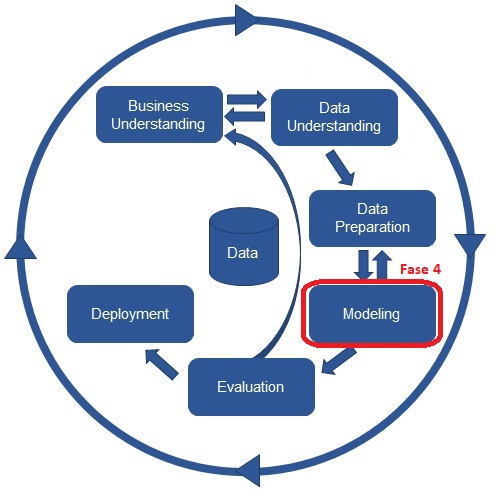

## SVR Máquinas de vector soporte

Support Vector Regression es una variante del modelo de análisis Support Vector Machine utilizado para clasificar, sin embargo, con esta variante el modelo de vector soporte se utiliza como un esquema de regresión para predecir valores.
Support Vector Regression utiliza el mismo principio con algunos cambios menores. En principio dado que la salida es un número real, se vuelve difícil predecir la información a mano dado que existen posibilidades infinitas. Para el caso de la regresión, entonces se establece un margen de tolerancia (hiperparámetro épsilon) cerca del vector con el fin de minimizar el error tomando en cuenta que parte de ese error es tolerado


In [ ]:
df_svr = df_scaler[["TeamStartingEquipmentValue","TimeAlive"]]
df_y_svr = df_scaler['RoundWinner']
df_x_svr = df_svr

In [ ]:
X_train, X_test, Y_train, Y_test_svr = train_test_split(df_x_svr, df_y_svr, test_size=0.30, random_state=700)

In [ ]:
svr_model = SVR(C=1.0, epsilon= 0.2)

In [ ]:
svr_model.fit(X_train,Y_train)

SVR(epsilon=0.2)

In [ ]:
svr_model.score(X_train, Y_train)

-0.09001363887138303

In [ ]:
svr_model.score(X_test, Y_test_svr)

-0.08261710346957218

In [ ]:
y_pred_svr = svr_model.predict(X_test)

## Regresión logística

La regresión logística es un modelo multivariante que nos permite estimar la relación existente entre una variable dependiente no métrica y un conjunto de variables independientes métricas o no métricas.
Podemos diferenciar 3 tipos de regresiones logísticas binaria,multinomial y ordinal sklearn 


*   fit_intercept: puede ser True/False si queremos tener una constante x o no

*   penalty: es la regularización existen distintos tipos L1,L2 y elasticnet

*   tol: es un parámetro que se encuentra dentro de los llamados early stopping es para que una vez alcanzado el criterio de tolerancia que nosotros fijemos, el algoritmo pare de iterar
*   C: un parámetro que aplica la regularización con el objetivo de reducir el overfitting, cuanto más pequeño es el valor, mayor es la regularización

*   class_weight: puede ser balanced/None dependiendo de si quieres balancear tu conjunto de datos o no, si tienes clases desbalanceadas.









In [ ]:
df_logistic = datasetLabel[['Team','Map','TeamStartingEquipmentValue','TimeAlive']]
df_y_logistic= datasetLabel['RoundWinner']
df_x_logistic= df_logistic

In [ ]:
X_train, X_test, Y_train, Y_test_RL = train_test_split(df_x_logistic, df_y_logistic, test_size=0.30, random_state=700)

In [ ]:
model_logistic = LogisticRegression(fit_intercept=True, penalty= 'l2')

In [ ]:
model_logistic.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
model_logistic.score(X_train, Y_train)

0.6239426393174805

In [ ]:
model_logistic.score(X_test, Y_test_RL)

0.6235069885641678

In [ ]:
y_pred_RL = model_logistic.predict(X_test)

## Arbol de Clasificación

Los árboles de decisión son representaciones graficas de posibles soluciones a una decisión basada en ciertas condiciones, es uno de los algoritmos de aprendizaje supervisado más utilizados en machine learning.

Entre los árboles de decisión existen 2 muy conocidos en machine learning llamados arboles de clasificación y arboles de regresión, lo cual como equipo decidimos utilizar un árbol de clasificación, esto debido a nuestro target binario en el cual predecimos si se ganó la ronda o no tomando 0 como que se perdió la ronda y 1 si se ganó.

A continuación, separaremos las columnas que nos interesan para el estudio.

In [ ]:
prediccion=datasetLabel[['Team', 'Map','TeamStartingEquipmentValue','TimeAlive']]
target= datasetLabel['RoundWinner']
prediccion

,Team,Map,TeamStartingEquipmentValue,TimeAlive
0,1,1,4400,51.120249
1,1,1,4400,43.486626
2,1,1,4400,37.354698
3,1,1,4400,47.678861
4,1,1,4400,53.122511
...,...,...,...,...
79152,0,2,27100,34.027207
79153,0,2,27100,29.261054
79154,0,2,27100,59.147178
79155,0,2,27100,42.582843


Cómo se mencionó anteriormente predeciremos si los jugadores ganaron la ronda, para esto necesitamos las siguientes columnas:


*   Team: la columna Team es fundamental, ya que, existen mapas con lados más favorables a ciertos equipos.
*   Map: el mapa es otra de las columnas fundamentales ya que va enlazada a el equipo como se mencionó anteriormente, además que hay jugadores con mayor conocimiento en ciertos mapas y que este puede ser su fuerte.
*   TeamStartingEquipmentValue: la economía del equipo en una ronda puede marcar la diferencia a la hora de ganarla, esto debido a las diferencias de compras que se dan a la hora del enfrentamiento, un equipo con alta economía podría ir "full buy" y enfrentarse a una ronda "económica" por el bando contrario.



A continuación, entrenaremos nuestro modelo definiendo nuestros datos de entrenamiento y los parámetros para realizar el entrenamiento.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(prediccion, target, test_size=0.30, random_state=200)

In [ ]:
arbol=DecisionTreeClassifier(max_depth=31)
arbol.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=31)

Mostramos el resultado del modelo con los datos de entrenamiento el cual nos da un porcentaje superior al 73%, pero debemos tomar en cuenta los datos con los cuales está clasificando la puntuación, ya que estos son los de entrenamiento.

In [ ]:
arbol.score(X_train, Y_train)

0.9652387003085859

Podemos observar que el resultado del entrenamiento con los datos de prueba supera el 70% lo cual es aceptable tomando en cuenta que son los datos de prueba

In [ ]:
arbol.score(X_test, Y_test)

0.7313426514188903

In [ ]:
y_pred = arbol.predict(X_test)

In [ ]:
matris_arbol = confusion_matrix(Y_test, y_pred)
print(matris_arbol)

[[9131 2798]
 [3545 8136]]


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74     11929
           1       0.74      0.70      0.72     11681

    accuracy                           0.73     23610
   macro avg       0.73      0.73      0.73     23610
weighted avg       0.73      0.73      0.73     23610



## KNN Clasificator 

El algoritmo KNN Classificator reconoce patrones en los datos sin un aprendizaje especifico, midiendo la distancia entre grupos de datos.

Es unos de los algoritmos más simples y robustos de aprendizaje.

In [ ]:
# Se definen columnas y target con las que se entrenara el modelo
df_knn = datasetLabel[['Team', 'Map','TeamStartingEquipmentValue','TimeAlive']]
df_y_knn = datasetLabel['RoundWinner']
df_x_knn = df_knn

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_x_knn, df_y_knn, test_size=0.30, random_state=700)

Realizaremos un entrenamiento de datos asignando un tamaño de 35% de los datos con una randomización de 700 buscando conseguir una buena aleatoriedad de datos.

In [ ]:
# creamos el objeto
model_knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# entrenamos el modelo
model_knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# realizamos predicciones de los datos de test
y_pred = model_knn.predict(X_test)

In [ ]:
#Las siguientes lineas evaluaran la precision de los modelos mas la matriz de confusion
matris_knn =confusion_matrix(Y_test, y_pred)
print(matris_knn)

[[8817 3024]
 [3732 8037]]


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72     11841
           1       0.73      0.68      0.70     11769

    accuracy                           0.71     23610
   macro avg       0.71      0.71      0.71     23610
weighted avg       0.71      0.71      0.71     23610



In [ ]:
model_knn.score(X_test, Y_test)

0.7138500635324015

Nos encontramos con que el modelo nos entrega un score de 0.68 nos encontramos que en la matriz de confusion se generan 10002 verdaderos positivos y 9043 verdaderos negativos y en contra de 3756 falsos positivos y 4904 falsos negativos no son los mejores resultados pero esperamos en un futuro seguir mejorando estos resultados 

## SVC Máquinas de vector soporte

Las máquinas de vectores de soporte permiten encontrar la mejor forma de clasificar entre distintas clases esta funciona correlacionando datos a un espacio de características de grandes dimensiones de forma que los puntos de datos se puedan categorizar incluso si los datos no se pueden separar linealmente de otro modo. En general se usa para problemas de clasificación aunque también se puede usar para problemas de regresión es un algoritmo de tipo supervisado y sus principales hiperparametros son kernel(para seleccionar la forma del hiperplano), c(es un parámetro de penalización de error para controlar el sobreajuste).
No es uno de los algoritmos más utilizados ya que necesita mucha capacidad de cálculo.


In [ ]:
df_svm = datasetLabel[["Team","Map",'TeamStartingEquipmentValue','TimeAlive']]
df_y_svm = datasetLabel['RoundWinner']
df_x_svm = df_svm

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_x_svm, df_y_svm, test_size=0.30, random_state=700)

In [ ]:
svm_model = SVC(kernel='poly')

In [ ]:
svm_model.fit(X_train,Y_train)

SVC(kernel='poly')

In [ ]:
svm_model.score(X_train, Y_train)

0.616609184970049

In [ ]:
svm_model.score(X_test, Y_test)

0.6213892418466751

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
#Las siguientes lineas evaluaran la precision de los modelos mas la matriz de confusion
matris_svc = confusion_matrix(Y_test, y_pred)
print(matris_svc)

[[7542 4299]
 [4640 7129]]


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63     11841
           1       0.62      0.61      0.61     11769

    accuracy                           0.62     23610
   macro avg       0.62      0.62      0.62     23610
weighted avg       0.62      0.62      0.62     23610



#Fase V Evaluation / Evaluación

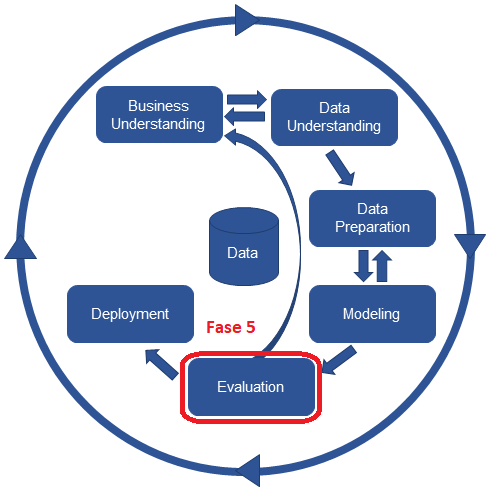

#### Modelos de Regresión

In [ ]:
print("------------------SVR------------------")
print("Mean Absolute Error", metrics.mean_absolute_error(Y_test_svr,y_pred_svr))
print("Mean Squared Error", metrics.mean_squared_error(Y_test_svr,y_pred_svr))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(Y_test_svr,y_pred_svr)))

------------------SVR------------------
Mean Absolute Error 0.7758857733798968
Mean Squared Error 1.0826071199600145
Root Mean Squared Error 1.0404840796283308


Para analizar el MAE(Mean Absolute Error) debemos de saber que es la diferencia entre el valor predicho y el valor verdadero por lo tanto tenemos una diferencia de 0.77 aproximado lo que no lleva a tener una diferencia bastante alta para este modelo sabiendo que los valores son 0 y 1.

con respecto a MSE(Mean Squared Error) debemos saber que es la distancia que hay entre un conjunto de puntos de la línea de regresión, ya sabiendo esto podemos analizar que al igual del punto anterior una diferencia de 1 con nuestro target es bastante sabiendo que los valores son 0 y 1.

Con respecto a RMSE(Root Mean Squared Error) podemos observar que la desviación estándar es cercana a 1 con un que para estos casos es un numero alto y afecta al modelo.


In [ ]:
print("----------Regresión Logistica----------")
print("Mean Absolute Error", metrics.mean_absolute_error(Y_test_RL,y_pred_RL))
print("Mean Squared Error", metrics.mean_squared_error(Y_test_RL,y_pred_RL))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(Y_test_RL,y_pred_RL)))

----------Regresión Logistica----------
Mean Absolute Error 0.37649301143583225
Mean Squared Error 0.37649301143583225
Root Mean Squared Error 0.613590263478677


Con respecto a la regresión logista podemos observar que todos sus valores son notablemente más bajos que SVR lo cual nos influye a la hora de tomar una decisión con respecto al modelo final, vemos un MAE de 0.37 aproximadamente al igual que el MSE con esto notamos que los puntos dentro de la regresión están más cercanos a la línea de regresión logística y que el modelo tiene una desviación estándar baja pero no es lo que buscamos obtener para el proyecto.


#### Heat map de matriz de confusión para modelos de clasificación


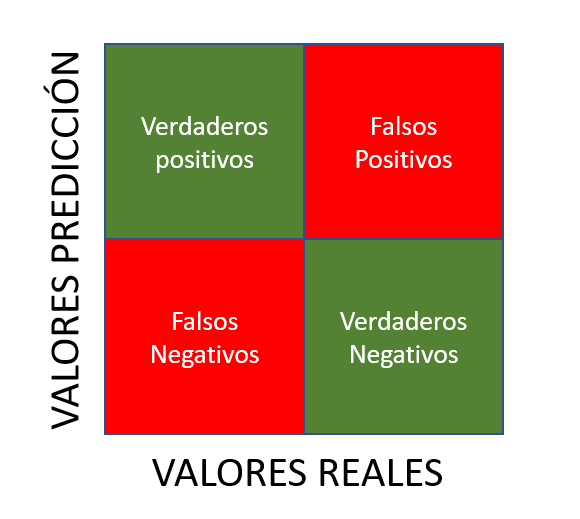

Para los modelos de clasificación tenemos como métricas de evaluación la matriz de confusión expresadas en un mapa de calor para entenderlo de mejor forma, para entender los gráficos necesitamos tener en consideración la imagen de arriba que expresa los falsos positivos, falsos negativos, verdaderos positivos y por ultimo los verdaderos negativos con esto se valida la exactitud de los modelos.

Text(0.5, 1.0, 'SVC')

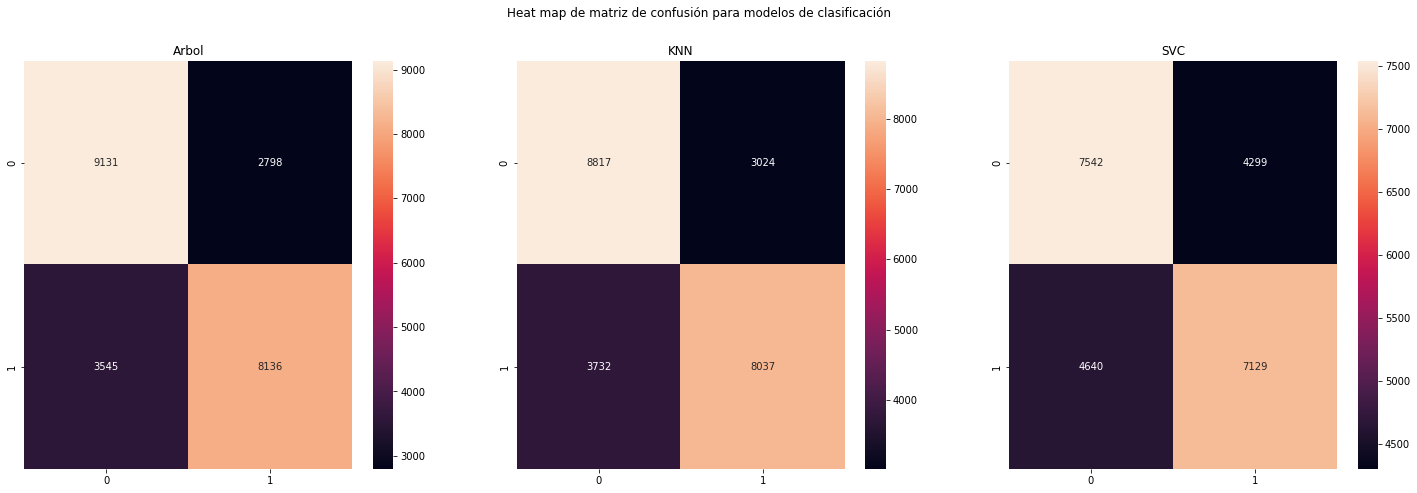

In [ ]:

fig, axes = plt.subplots(1,3,figsize=(25, 7.5))
fig.suptitle("Heat map de matriz de confusión para modelos de clasificación")
# mapa de calor para arbol de clasificación
a = sns.heatmap(matris_arbol,annot=True, fmt="d", ax=axes[0])
a.set_title("Arbol")
# mapa de calor para KNN de clasificación

k = sns.heatmap(matris_knn,annot=True, fmt="d", ax=axes[1])
k.set_title("KNN")
# mapa de calor para SVC de clasificación
s = sns.heatmap(matris_svc,annot=True, fmt="d",ax=axes[2])
s.set_title("SVC")

Como podemos observar en los gráficos de calor el mejor modelo de los entrenados es árbol de clasificación que en total tiene 6343 predicciones erradas y por ende el con más aciertos esto nos valida el porcentaje de accuracy visto en los modelos.

* Arbol
  *   Falsos 6.343 
  *   Verdaderos 17.267

* Knn
  *   Falsos 6.756
  *   Verdaderos 16.854

* SVC
  *   Falsos 8.939 
  *   Verdaderos 14.671


#Conclusión

En este punto ya analizando las métricas de los diferentes modelos pudimos observar y confirmar que en definitiva los modelos de regresión no sirven para nuestros datos esto debido a que el Target es binario por lo tanto es más efectivo un algoritmo de clasificación, esto se ve reflejado en los porcentajes de score de los modelos y en sus diferentes métricas, el modelo que mejor se ajusta a nuestros datos (tomando en cuenta su score  y métricas) es el árbol de clasificación que cuenta con un accuracy cercano al 73% para las variables nuevas (test), aunque los otros modelos no se quedan atrás debido a que también sus porcentajes para predecir si un equipo en concreto gana o no una ronda es cercano al 70%.

En un futuro esperamos mejorar estos porcentajes quizás con una data más reciente se pueda llegar a la meta deseada.
